<a href="https://colab.research.google.com/github/YashviP/student_data_analysis/blob/master/student_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 9999


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
student_data=pd.read_csv('/content/datasets_251_561_student-mat.csv')

This dataset  contains information about the life of students of mathematical courses and their academic success. So let's examine in detail the information about the students and find out what influences their grades the most.




In [ ]:
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [ ]:
student_data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

*Let's see which age group of students we are dealing*



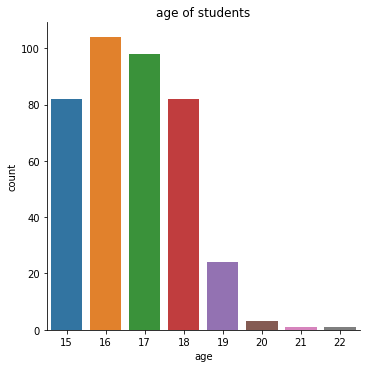

In [ ]:
sns.catplot(x="age", kind="count", data=student_data, height = 5)
plt.title('age of students')
plt.show()

And so, basically we are dealing with students 15-22 years ,mostly are of 15-19

*let's look at the gender of our students. Count the number of boys and girls.*

Text(0.5, 1.0, 'Gender of students : F - female,M - male')

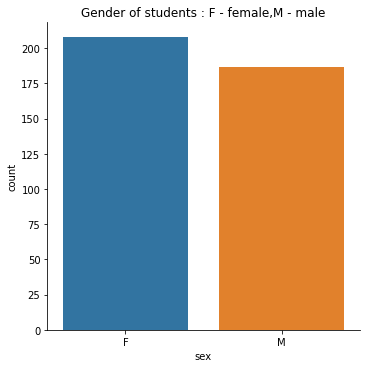

In [ ]:
sns.catplot(x="sex", kind="count",data=student_data, height = 5)
plt.title("Gender of students : F - female,M - male")

In [ ]:
student_data['sex'].value_counts(normalize=True)

F    0.526582
M    0.473418
Name: sex, dtype: float64

So 52%(approx) of data is female and 48%(approx) is male  

In [ ]:
student_data['studytime'].value_counts()

2    198
1    105
3     65
4     27
Name: studytime, dtype: int64

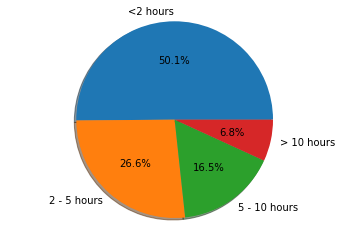

In [ ]:
labels = ['<2 hours','2 - 5 hours','5 - 10 hours','> 10 hours']
values = student_data["studytime"].value_counts().tolist()

fig1, ax1 = plt.subplots()
ax1.pie(values,labels=labels, autopct='%1.1f%%',
        shadow=True)
ax1.axis('equal') 

plt.show()

Most students spend 2 to 5 and 5 to 10 hours a week studying. It would be better if we had the exact number of hours for each student.

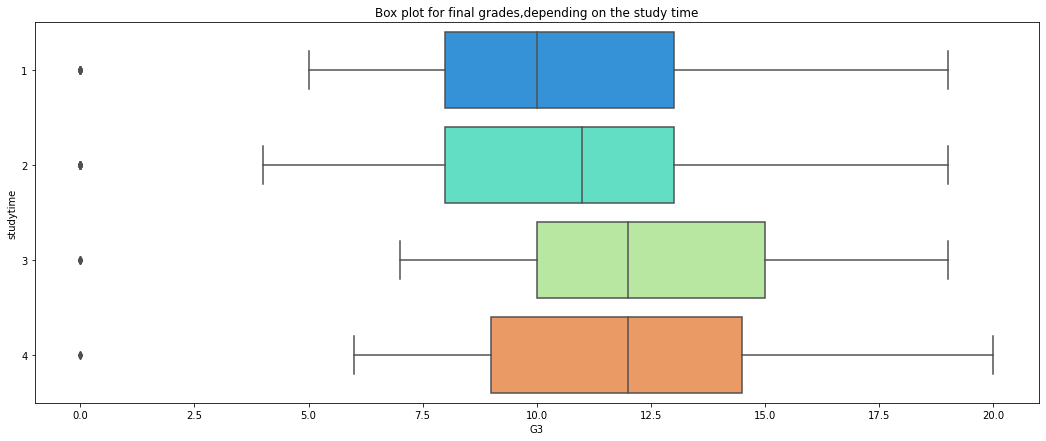

In [ ]:
plt.figure(figsize=(18,7))
plt.title("Box plot for final grades,depending on the study time")
sns.boxplot(y="studytime", x="G3", data = student_data , orient="h", palette = 'rainbow')

In [ ]:
student_data[student_data['studytime']==1]['G3'].mean()

10.047619047619047

In [ ]:
student_data[student_data['studytime']==2]['G3'].mean()

10.171717171717171

In [ ]:
student_data[student_data['studytime']==3]['G3'].mean()

11.4

In [ ]:
student_data[student_data['studytime']==4]['G3'].mean()

11.25925925925926

The lowest average result is shown by students who spend less than two hours a week studying.Few students spend more than 10 hours a week studying. and they are showing a very good result

Text(0.5, 1.0, 'Students address: U - urban, R - rural')

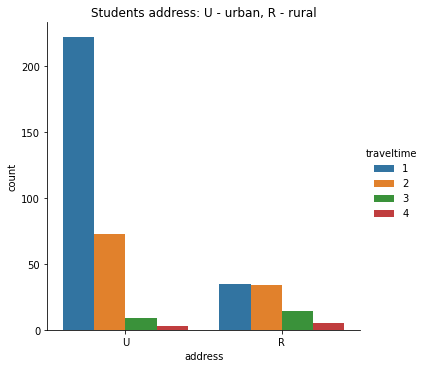

In [ ]:
sns.catplot(x="address", kind="count",hue = "traveltime", data=student_data, height = 5)
plt.title("Students address: U - urban, R - rural")


 time that students spend on the way to school
( 1 - very close, 4 - very far).

Most of the students live in the city. Few students take long to get to school.

Let's see the effect of absence based on Urban or Rural areas



Text(0.5, 1.0, 'Distribution of absences for students who live in village')

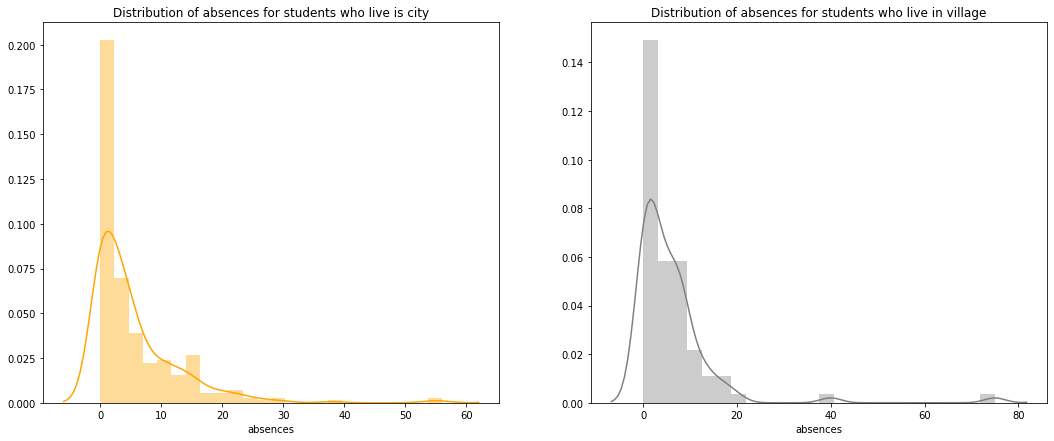

In [ ]:
f= plt.figure(figsize=(18,7))

ax=f.add_subplot(121)
sns.distplot(student_data[(student_data['address'] == 'U')]["absences"],color='orange',ax=ax)
ax.set_title('Distribution of absences for students who live is city')

ax=f.add_subplot(122)
sns.distplot(student_data[(student_data['address'] == 'R')]['absences'],color='gray',ax=ax)
ax.set_title('Distribution of absences for students who live in village')

There is not much difference between absence of students living in city and students living in village

In [ ]:
student_data['famsize'].value_counts()

GT3    281
LE3    114
Name: famsize, dtype: int64

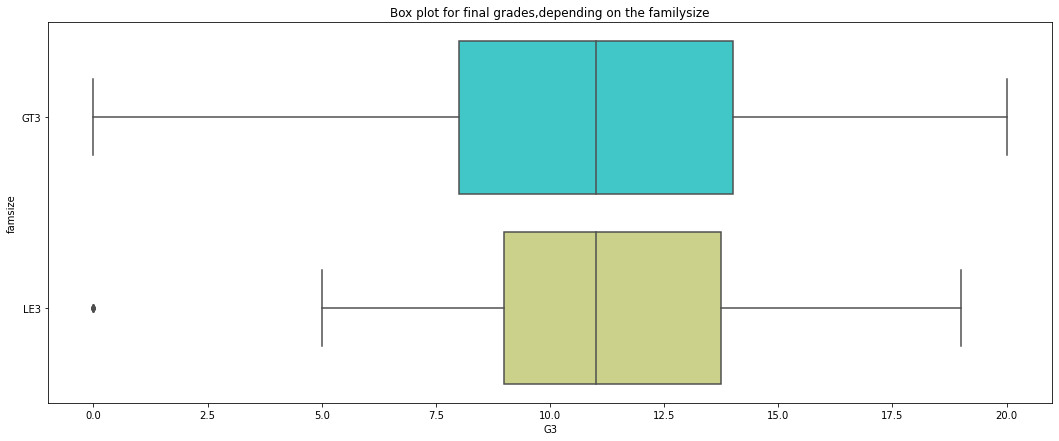

In [ ]:
plt.figure(figsize=(18,7))
plt.title("Box plot for final grades,depending on the familysize")
sns.boxplot(y="famsize", x="G3", data = student_data , orient="h", palette = 'rainbow')

In [ ]:
student_data[student_data['famsize']=='GT3']['G3'].mean()


10.177935943060499

In [ ]:
student_data[student_data['famsize']=='LE3']['G3'].mean()

11.0

students with family size <= 3 has little less average grade than students whose family size > 3 but this is not giving us as much information about grade score


In [ ]:
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


Relationship status

Text(0.5, 1.0, 'Relationship status with age')

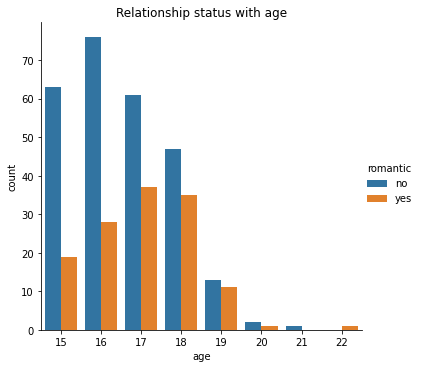

In [ ]:
sns.catplot(x="age", kind="count",hue = "romantic", data=student_data, height = 5)
plt.title("Relationship status with age")

Text(0.5, 1.0, 'relationship status of students ')

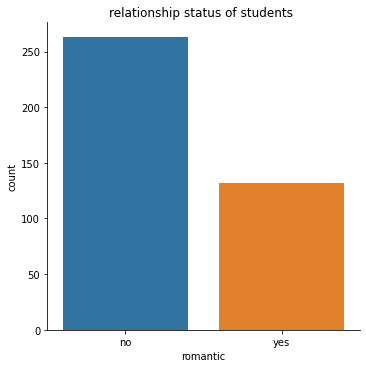

In [ ]:
sns.catplot(x="romantic", kind="count",data=student_data, height = 5)
plt.title("relationship status of students ")

count of single students are more than students with relationship

Now let's see how relationship status affect grades

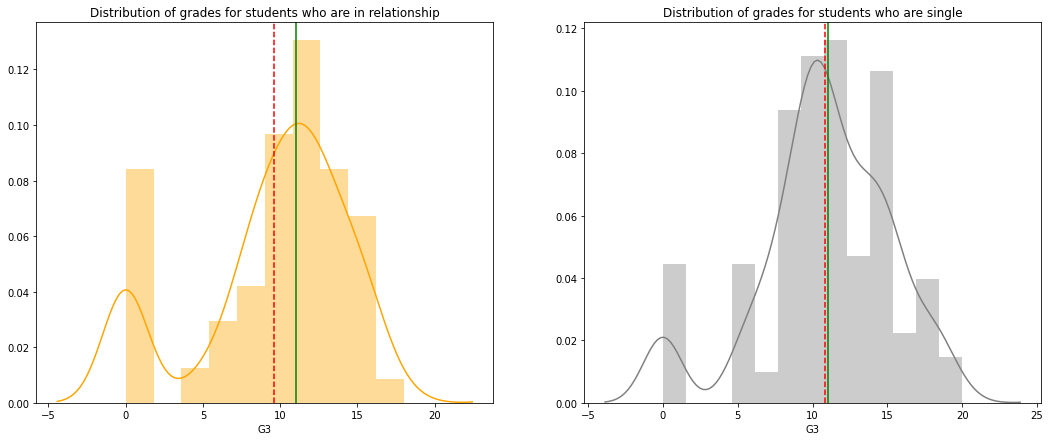

In [ ]:
f= plt.figure(figsize=(18,7))

ax=f.add_subplot(121)
sns.distplot(student_data[(student_data['romantic'] == 'yes')]["G3"],color='orange',ax=ax)
ax.set_title('Distribution of grades for students who are in relationship')
mean=student_data[student_data['romantic']=='yes']['G3'].mean()
median=student_data[student_data['romantic']=='yes']['G3'].median()


ax.axvline(mean, color='r', linestyle='--')
ax.axvline(median, color='g', linestyle='-')

ax=f.add_subplot(122)
sns.distplot(student_data[(student_data['romantic'] == 'no')]['G3'],color='gray',ax=ax)
ax.set_title('Distribution of grades for students who are single')

mean=student_data[student_data['romantic']=='no']['G3'].mean()
median=student_data[student_data['romantic']=='no']['G3'].median()



ax.axvline(mean, color='r', linestyle='--')
ax.axvline(median, color='g', linestyle='-')

As seen from the graph avg score of grades of single students  is more than students with relationship

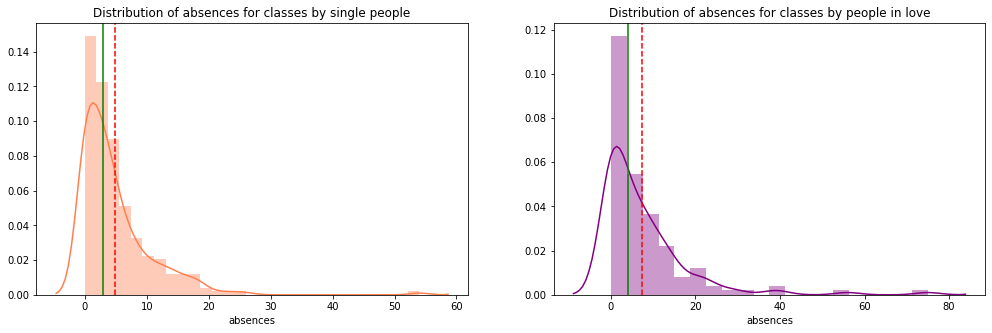

In [ ]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
sns.distplot(student_data[(student_data.romantic == 'no')]["absences"],color='coral',ax=ax)
ax.set_title('Distribution of absences for classes by single people')

mean=student_data[student_data['romantic']=='no']['absences'].mean()
median=student_data[student_data['romantic']=='no']['absences'].median()
ax.axvline(mean, color='r', linestyle='--')
ax.axvline(median, color='g', linestyle='-')

ax=f.add_subplot(122)
sns.distplot(student_data[(student_data.romantic == 'yes')]['absences'],color='purple',ax=ax)
ax.set_title('Distribution of absences for classes by people in love')
mean=student_data[student_data['romantic']=='yes']['absences'].mean()
median=student_data[student_data['romantic']=='yes']['absences'].median()
ax.axvline(mean, color='r', linestyle='--')
ax.axvline(median, color='g', linestyle='-')

Single people miss fewer classes than people in love

In [ ]:
student_data['Talc'] = student_data['Dalc'] + student_data['Walc']


In [ ]:
student_data[student_data['romantic']=='no']['Talc'].count()

263

In [ ]:
student_data[student_data['romantic']=='yes']['Talc'].count()

132

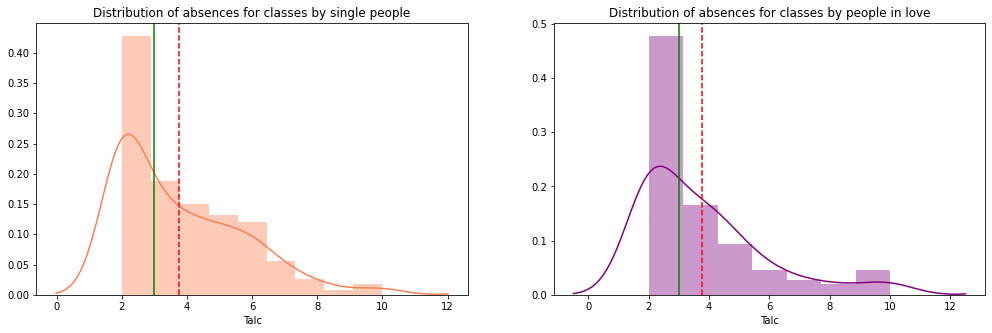

In [ ]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
sns.distplot(student_data[(student_data['romantic'] == 'no')]["Talc"],color='coral',ax=ax)
ax.set_title('Distribution of absences for classes by single people')

mean=student_data[student_data['romantic']=='no']['Talc'].mean()
median=student_data[student_data['romantic']=='no']['Talc'].median()
ax.axvline(mean, color='r', linestyle='--')
ax.axvline(median, color='g', linestyle='-')

ax=f.add_subplot(122)
sns.distplot(student_data[(student_data['romantic'] == 'yes')]['Talc'],color='purple',ax=ax)
ax.set_title('Distribution of absences for classes by people in love')
mean=student_data[student_data['romantic']=='yes']['Talc'].mean()
median=student_data[student_data['romantic']=='yes']['Talc'].median()
ax.axvline(mean, color='r', linestyle='--')
ax.axvline(median, color='g', linestyle='-')

* On an average single people and commited people 
drink 3 times a week.

* count of single drinkers are more than commited

**Amount of alcohol and health**

In [ ]:
student_data['health'].value_counts(normalize=True)

5    0.369620
3    0.230380
4    0.167089
1    0.118987
2    0.113924
Name: health, dtype: float64

* It can be seen that around 11% students health conditions are extremely bad.


* 36% of students health comditions are very good


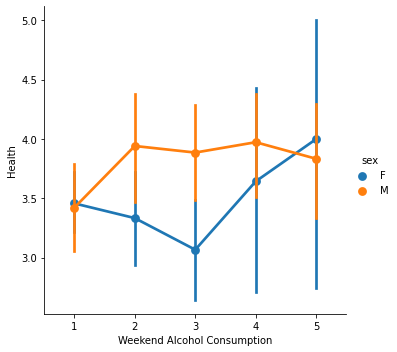

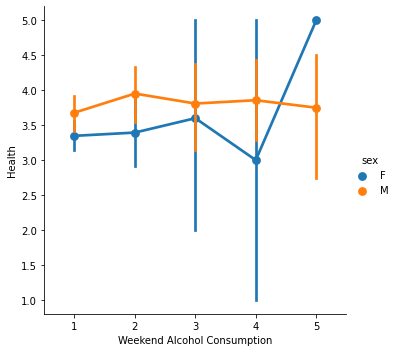

In [ ]:
plot1 = sns.factorplot(x="Walc", y="health", hue="sex", data=student_data)
plot1.set(ylabel="Health", xlabel="Weekend Alcohol Consumption")


plot2 = sns.factorplot(x="Dalc", y="health", hue="sex", data=student_data)
plot2.set(ylabel="Health", xlabel="Weekend Alcohol Consumption")



**Alcohol consumption and Grade**

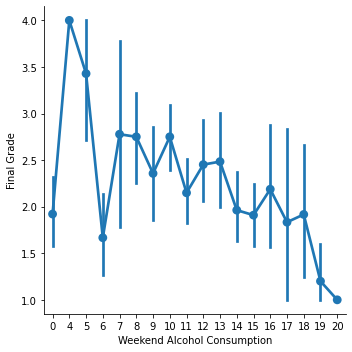

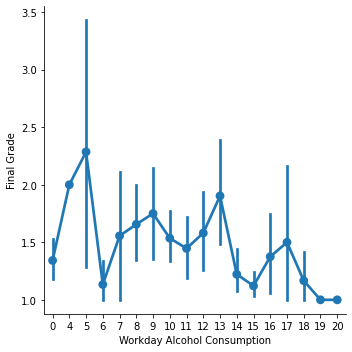

In [ ]:
plot1 = sns.factorplot(x="G3", y="Walc", data=student_data)
plot1.set(ylabel="Final Grade", xlabel="Weekend Alcohol Consumption")

plot2 = sns.factorplot(x="G3", y="Dalc", data=student_data)
plot2.set(ylabel="Final Grade", xlabel="Workday Alcohol Consumption")

Health vs grade

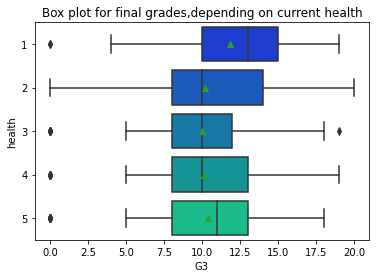

In [ ]:
plt.title("Box plot for final grades,depending on current health")
sns.boxplot(y="health", x="G3", data = student_data , orient="h", palette = 'winter',showmeans=True)




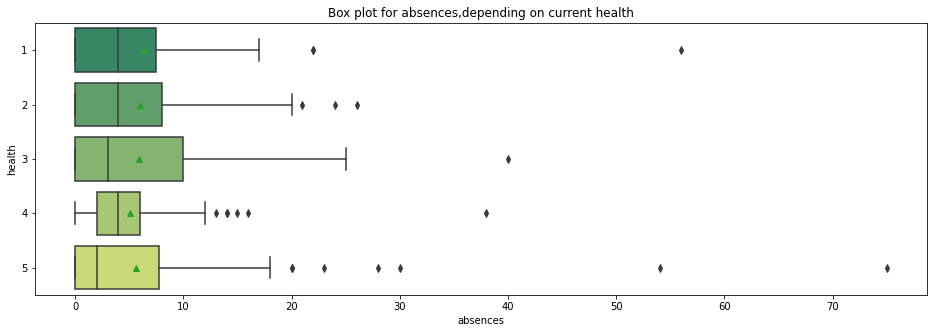

In [ ]:
plt.figure(figsize=(16,5))
plt.title("Box plot for absences,depending on current health")
sns.boxplot(y="health", x="absences", data = student_data , orient="h", palette = 'summer',showmeans=True)

There is no tangible connection between the level of health of the student and the number of absences to classes.

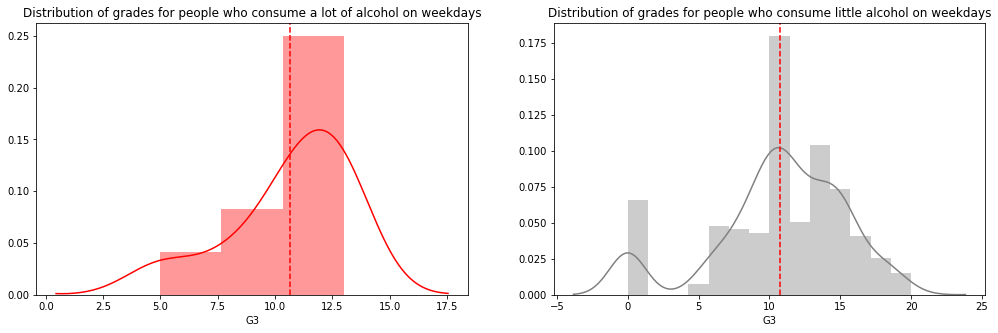

In [ ]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
sns.distplot(student_data[(student_data.Dalc == 5)]["G3"],color='red',ax=ax)
ax.set_title('Distribution of grades for people who consume a lot of alcohol on weekdays')

mean=student_data[student_data['Dalc']==5]['G3'].mean()
ax.axvline(mean, color='r', linestyle='--')



ax=f.add_subplot(122)
sns.distplot(student_data[(student_data.Dalc == 1)]['G3'],color='gray',ax=ax)
ax.set_title('Distribution of grades for people who consume little alcohol on weekdays')

mean=student_data[student_data['Dalc']==1]['G3'].mean()
ax.axvline(mean, color='r', linestyle='--')

Drinking alcohol on weekdays is a bad idea! :D Of course, the number of those who love to drink on weekdays is much less than the number of those who prefer to spend weekdays sober. But we can see that the final grades of these students are significantly lower.

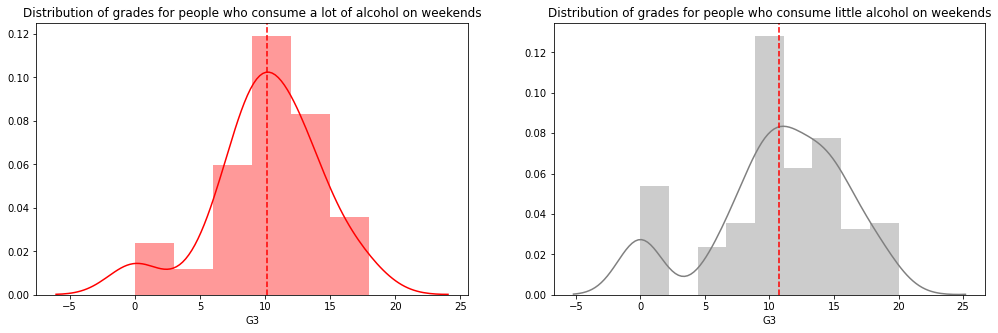

In [ ]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
sns.distplot(student_data[(student_data.Walc == 5)]["G3"],color='red',ax=ax)
ax.set_title('Distribution of grades for people who consume a lot of alcohol on weekends')

mean=student_data[student_data['Walc']==5]['G3'].mean()
ax.axvline(mean, color='r', linestyle='--')



ax=f.add_subplot(122)
sns.distplot(student_data[(student_data.Walc == 1)]['G3'],color='gray',ax=ax)
ax.set_title('Distribution of grades for people who consume little alcohol on weekends')

mean=student_data[student_data['Walc']==1]['G3'].mean()
ax.axvline(mean, color='r', linestyle='--')

How many students want to get higher education

Text(0.5, 1.0, 'How many students want to get higher education?')

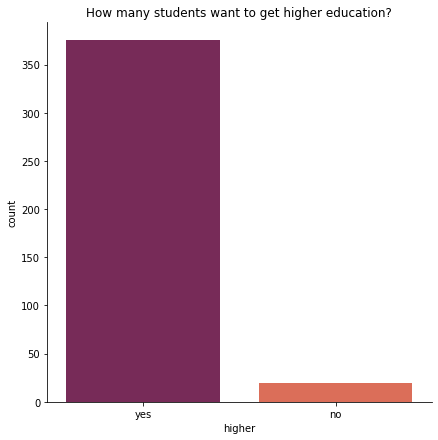

In [ ]:
sns.catplot(x="higher", kind="count",palette="rocket", data=student_data, height = 6)
plt.title("How many students want to get higher education?")


almost all students want to get higher education

**Distribution of grades for students who does not want to get higher education**

Text(0.5, 1.0, 'Distribution of grades for students who does not want to get higher education')

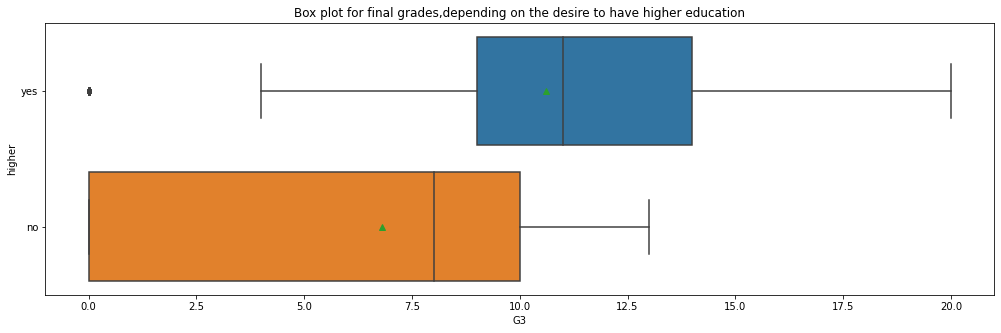

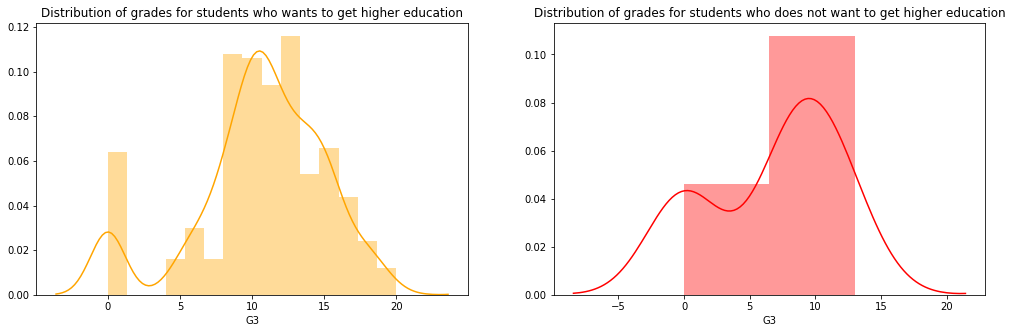

In [ ]:
plt.figure(figsize=(17,5))
plt.title("Box plot for final grades,depending on the desire to have higher education")
sns.boxplot(y="higher", x="G3", data = student_data , orient="h", palette = 'tab10',showmeans=True)

f= plt.figure(figsize=(17,5))
ax=f.add_subplot(121)
sns.distplot(student_data[(student_data.higher == 'yes')]["G3"],color='orange',ax=ax)
ax.set_title('Distribution of grades for students who wants to get higher education')

ax=f.add_subplot(122)
sns.distplot(student_data[(student_data.higher == 'no')]['G3'],color='red',ax=ax)
ax.set_title('Distribution of grades for students who does not want to get higher education')


desire to get higher education stimulates students to get higher grades

**How many students have not Internet**

Text(0.5, 1.0, 'How many students do not have Internet')

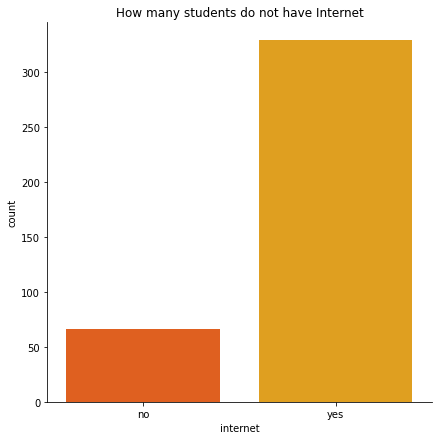

In [ ]:
sns.catplot(x="internet", kind="count",palette="autumn", data=student_data, height = 6)
plt.title("How many students do not have Internet")

**let's see whether the availability of the Internet affects the number of hours students spend on their studies.**

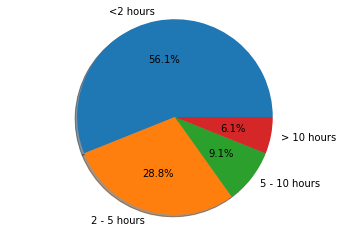

In [ ]:

labels = ['<2 hours','2 - 5 hours','5 - 10 hours','> 10 hours']
values =student_data[(student_data.internet == 'no')].studytime.value_counts().tolist()

fig1, ax1 = plt.subplots()
ax1.pie(values,labels=labels, autopct='%1.1f%%',
        shadow=True)
ax1.axis('equal') 

plt.show()

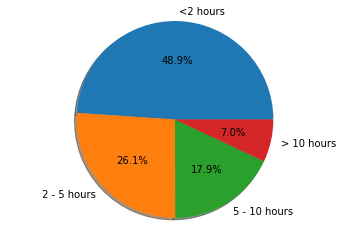

In [ ]:
labels = ['<2 hours','2 - 5 hours','5 - 10 hours','> 10 hours']
values =student_data[(student_data.internet == 'yes')].studytime.value_counts().tolist()

fig1, ax1 = plt.subplots()
ax1.pie(values,labels=labels, autopct='%1.1f%%',
        shadow=True)
ax1.axis('equal') 

plt.show()

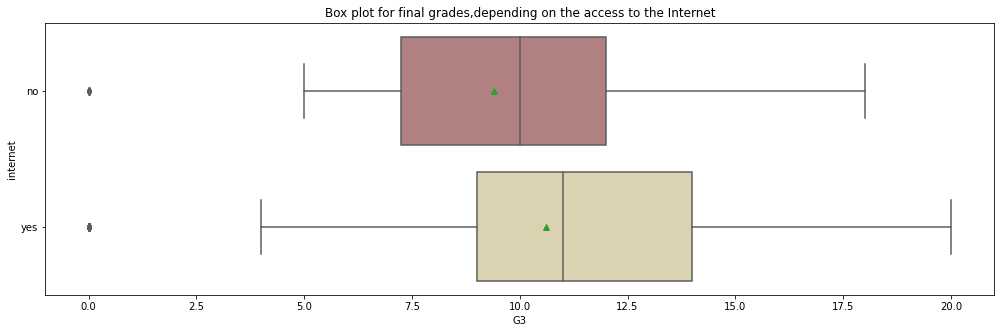

In [ ]:
plt.figure(figsize=(17,5))
plt.title("Box plot for final grades,depending on the access to the Internet")
sns.boxplot(y="internet", x="G3", data = student_data , orient="h", palette = 'pink',showmeans=True)

students having internet having average grade is much more than students having no internet

# **Final Conclusions** -
* On an average single people and commited people drink 3 times a week.

* count of single drinkers are more than commited
* Most students spend 2 to 5 and 5 to 10 hours a week studying.
* avg score of grades of single students is more than students with relationship

* It can be seen that around 11% students health conditions are extremely bad and 36% of students health comditions are very good

* There is no tangible connection between the level of health of the student and the number of absences to classes.

* Drinking alcohol on weekdays is a bad idea! :D Of course, the number of those who love to drink on weekdays is much less than the number of those who prefer to spend weekdays sober. But we can see that the final grades of these students are significantly lower.

* almost all students want to get higher education

* students having internet having average grade is much more than students having no internet